# Lecture 3: Data Visualization

**Matplotlib** is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible. Each of the plot objects created by pandas is a [matplotlib](https://matplotlib.org/) object.

*   Create publication quality plots.
*   Make interactive figures that can zoom, pan, update.
*   Customize visual style and layout.
*   Export to many file formats .
*   Embed in JupyterLab and Graphical User Interfaces.
*   Use a rich array of third-party packages built on Matplotlib.

**Seaborn** is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. [https://seaborn.pydata.org/](https://seaborn.pydata.org/)

Codes taken from "Python for Data Analysis" book by Wes McKinney, published by O'Reilly Media,
edX: Python for Data Science, UCSanDiegoX (DSE200x), and official sites' tutorials.

In [1]:
#%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(12345)

#Set the global rc params
plt.rc('figure', figsize=(8, 5))

## Primer

Line chart is the default plot for numeric data. You can plot from numpy array, pandas' series or pandas' dataframe.

<class 'numpy.ndarray'>
[0 1 2 3 4 5 6 7 8 9]


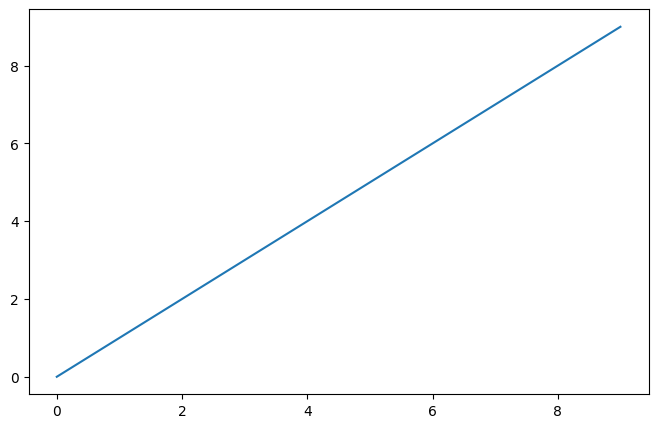

In [2]:
# Ndarray
#array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
data = np.arange(10)
print(type(data))
print(data)
plt.plot(data)

0    -0.204708
10    0.274236
20   -0.245203
30   -0.800933
40    1.164847
50    2.558253
60    2.651161
70    2.932907
80    3.701930
90    4.948364
dtype: float64


<Axes: >

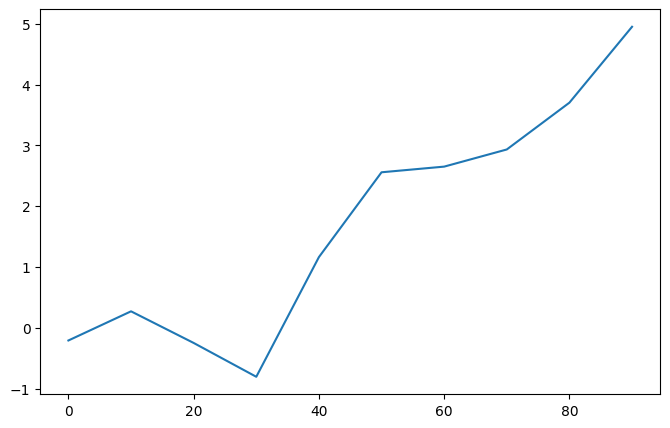

In [3]:
# Series
#cumsum - Return the cumulative sum of the elements
#'k--' is a style option instructing matplotlib to plot a black dashed line
s1 = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
print(s1)
s1.plot()

### Styles and Labels

<Axes: xlabel='Index', ylabel='Cumulative'>

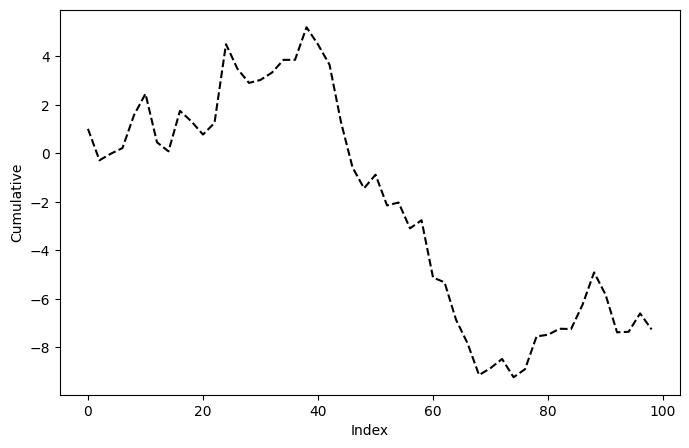

In [4]:
# Adjusting the line color and style
# Setting labels on the x and y axis
s2 = pd.Series(np.random.randn(50).cumsum(), index=np.arange(0, 100, 2))
s2.plot(style='k--',xlabel='Index', ylabel='Cumulative')

([<matplotlib.axis.XTick at 0x11d23d450>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90'),
  Text(100, 0, '100')])

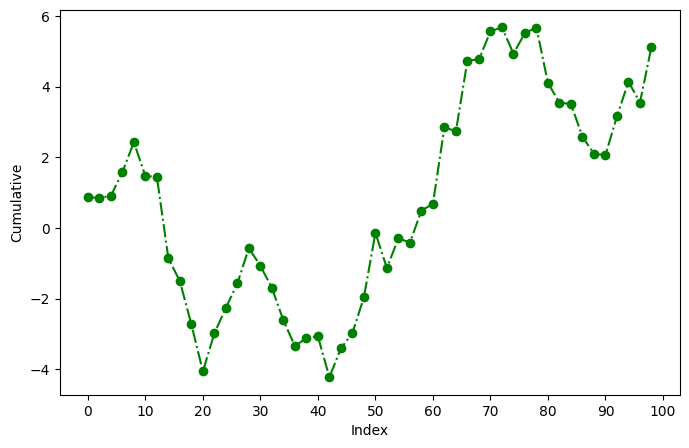

In [5]:
# Adjusting the line color, style, and marker
s3 = pd.Series(np.random.randn(50).cumsum(), index=np.arange(0, 100, 2))
s3.plot(color='g', linestyle='dashdot', marker='o',xlabel='Index', ylabel='Cumulative')
# Setting X ticks through pyplot interface, althought you can set via series
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

Text(0.5, 1.0, 'My plot')

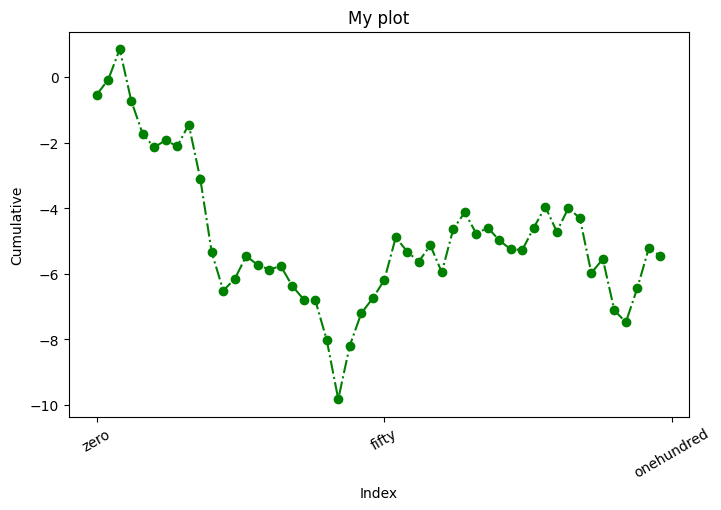

In [6]:
# Adjusting the line color, style, and marker
s3 = pd.Series(np.random.randn(50).cumsum(), index=np.arange(0, 100, 2))
s3.plot(color='g', linestyle='dashdot', marker='o',xlabel='Index', ylabel='Cumulative')
# Setting X tick labels
plt.xticks([0, 50, 100], labels=['zero','fifty','onehundred'], rotation=30)
plt.title('My plot')

<Axes: xlabel='Index', ylabel='Cumulative'>

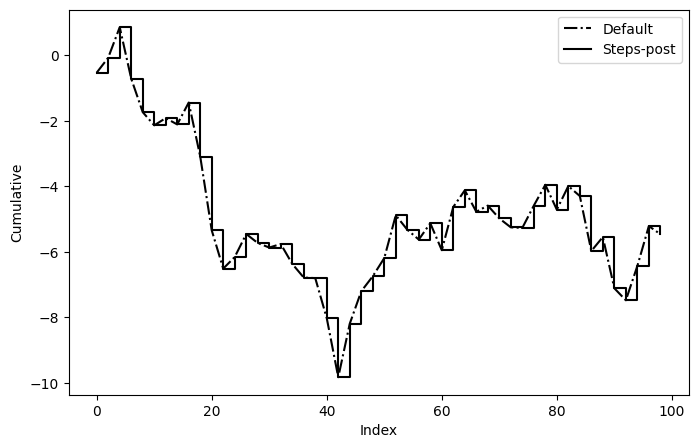

In [7]:
# Multiple plots in a figure
s3.plot(color='k',linestyle='dashdot', label='Default', legend=True)
s3.plot(color='k', drawstyle='steps-post', label='Steps-post', xlabel='Index', ylabel='Cumulative', legend=True)

### Figures and Subplots

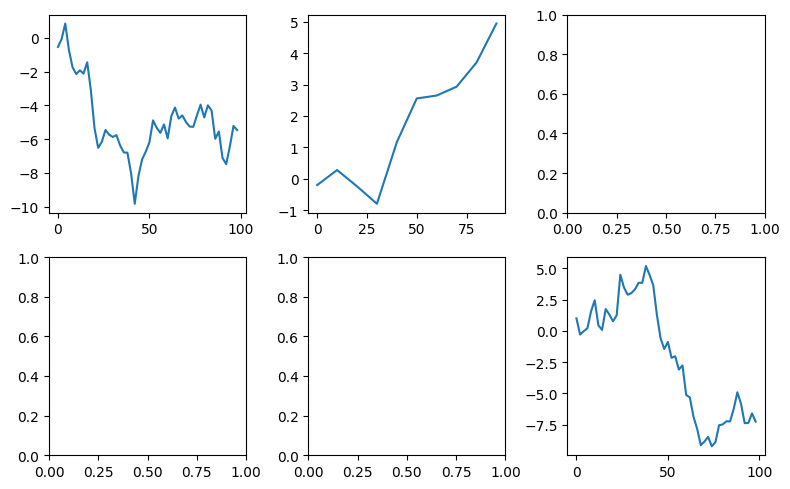

In [8]:
fig, axes = plt.subplots(2, 3)
s1.plot(ax=axes[0,1])
s2.plot(ax=axes[1,2])
s3.plot(ax=axes[0,0])
fig.tight_layout() # improve subplots spacing

## Plotting from DataFrame

### Line Plots

DataFrame’s plot method plots each of its columns as a different line on the same subplot, creating a legend automatically<br/>
df.plot() equivalent to df.plot.line()

           A         B         C         D
0  -0.416232 -0.116747 -1.844788  2.068708
10 -1.193200  1.323420 -1.955345  3.296095
20  0.727585  2.069853  0.269315  2.616694
30  1.454953  1.201122 -0.944536  2.146064
40  0.535712  0.362295 -0.509381  1.588259
50 -0.031743 -0.010346 -1.435938  3.343367
60  1.178067  1.259679 -2.410316  2.708658
70  0.782366  0.970243 -3.144613  1.980153
80  1.621141  1.237136 -2.423419  2.891136
90  0.600239 -0.176280 -1.126811  3.143411


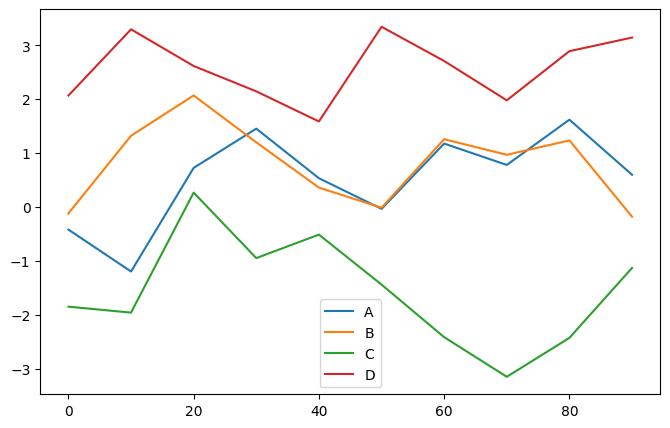

In [9]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()
print(df)

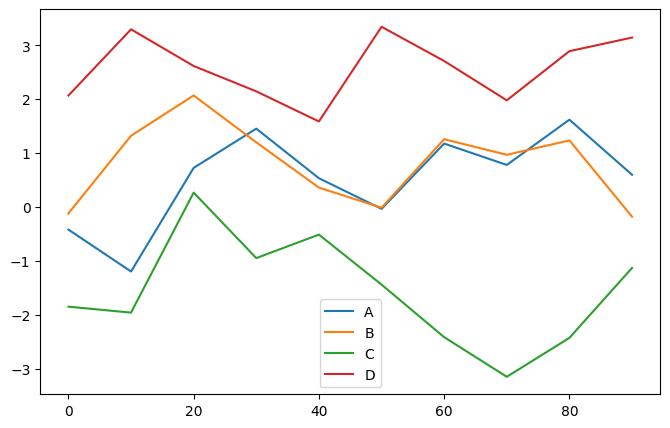

In [10]:
# Same with above
df.plot.line()

# Saving plot to a file
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

### Bar Plots

<Axes: >

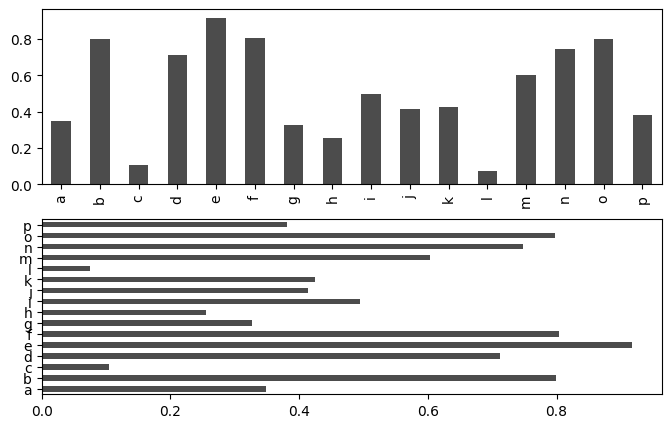

In [11]:
#create a 2 by 1 subplots, we can then access using axes array
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [12]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.797158,0.471797,0.721399,0.189213
two,0.434596,0.823468,0.826273,0.189525
three,0.020102,0.703491,0.347270,0.419504
four,0.768089,0.962878,0.892565,0.134942
five,0.797805,0.682091,0.530053,0.865982
six,0.753248,0.093203,0.329439,0.412363


<Axes: >

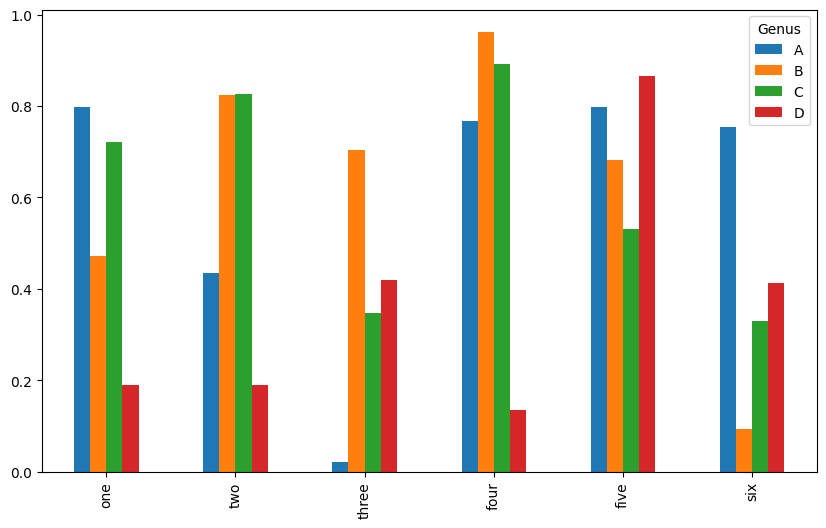

In [14]:
#Q: plot a bar chart from dataframe above
df.plot(kind='bar', figsize=(10, 6))


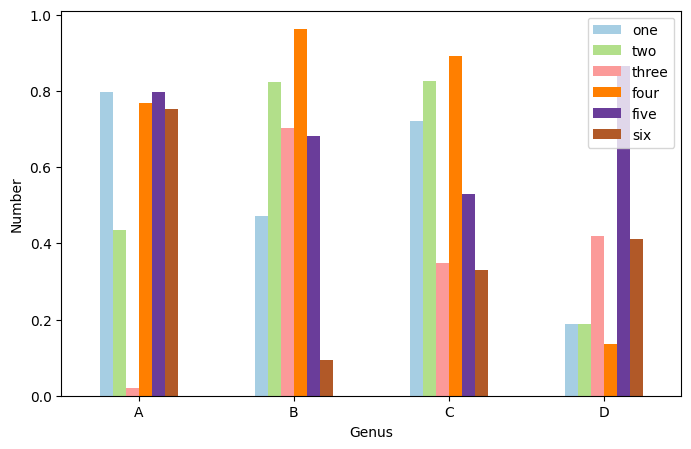

In [15]:
# Transpose then plot, so columns are X axis, rot = rotation of the x axis labels
# More colormap see https://matplotlib.org/stable/tutorials/colors/colormaps.html
df.transpose().plot.bar(ylabel='Number',rot=0, colormap='Paired')
#Q: put legend on the upper right corner
plt.legend(loc='upper right')
plt.show()

**Horizontal Bar**

<Axes: xlabel='Stacked Numbers'>

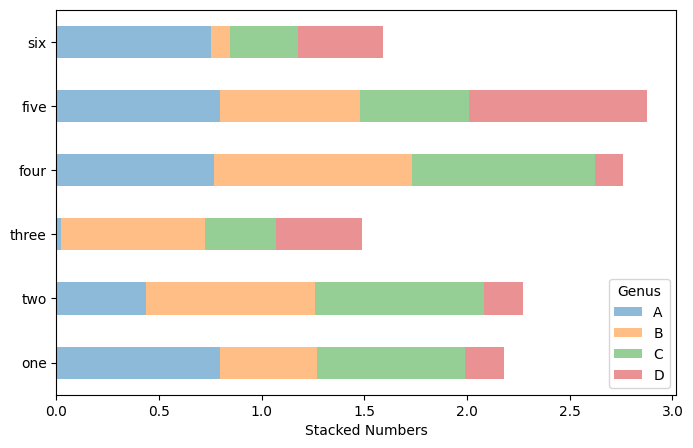

In [16]:
df.plot.barh(stacked=True, alpha=0.5, xlabel='Stacked Numbers')

### Scatter plot

<Axes: xlabel='A', ylabel='B'>

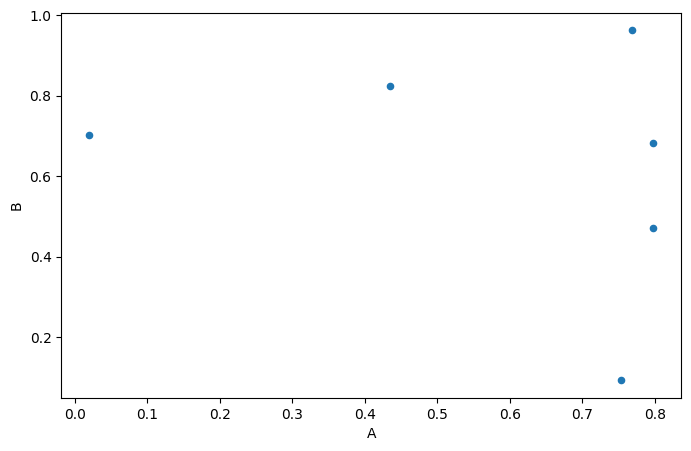

In [17]:
#Q: Plot a scatter plot of the dataframe between values in column A (x-axis) and column B (y-axis).
df.plot.scatter(x='A', y='B')

<Axes: xlabel='A', ylabel='B'>

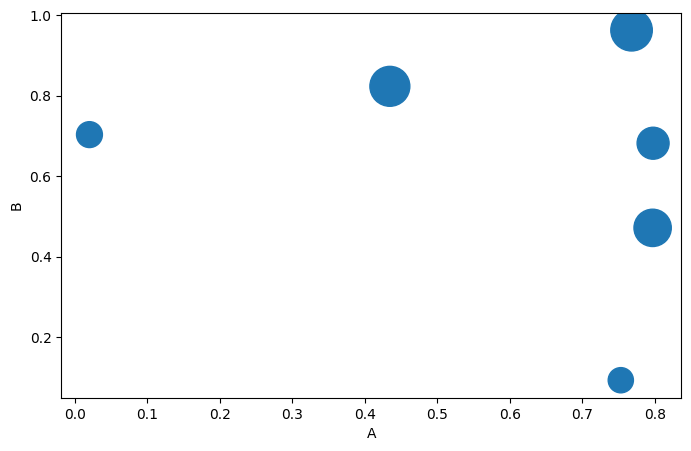

In [18]:
# Add size dimension
df.plot.scatter(x='A', y='B', s=df['C']*1000)

<Axes: xlabel='A', ylabel='B'>

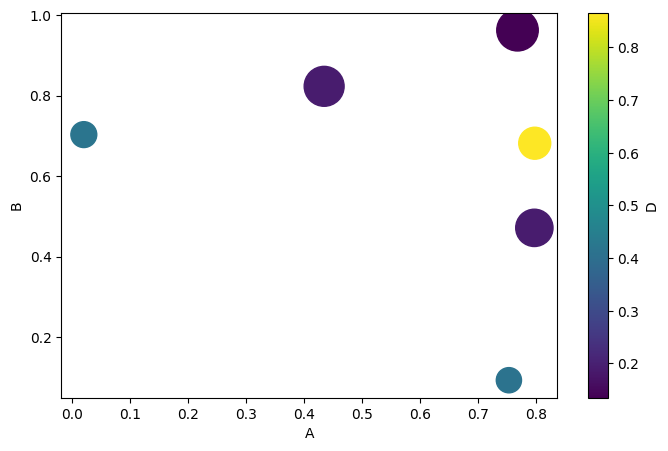

In [19]:
# Add Color dimension https://matplotlib.org/stable/tutorials/colors/colormaps.html
df.plot.scatter(x='A', y='B', s=df['C']*1000, c='D', colormap='viridis')

### Pie Chart

In [20]:
df = pd.DataFrame({'team': ['A', 'A', 'B', 'B', 'B', 'B', 'C', 'C'],
                   'points': [25, 12, 25, 14, 19, 53, 25, 29]
                   })
df

,team,points
0,A,25
1,A,12
2,B,25
3,B,14
4,B,19
5,B,53
6,C,25
7,C,29


In [21]:
team = df.groupby(['team']).agg( sum_points=('points','sum'), count_game=('points','count'))
team

,sum_points,count_game
team,,
A,37,2
B,111,4
C,54,2


<Axes: title={'center': 'Points Scored by Team'}, ylabel='sum_points'>

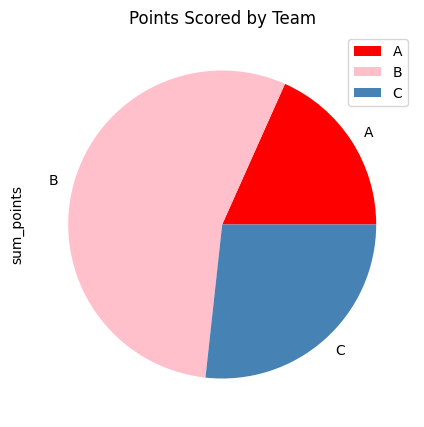

In [22]:
team.plot.pie(y='sum_points',colors = ['red', 'pink', 'steelblue'],
                                title='Points Scored by Team')

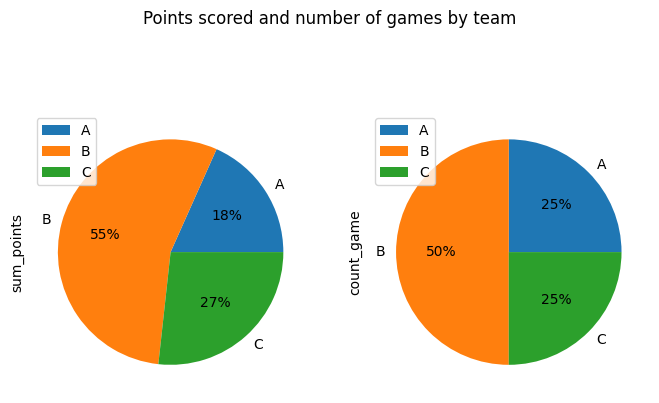

In [23]:
# If no column reference is passed and subplots=True a pie plot is drawn for each numerical column independently.
pie = team.plot.pie(subplots=True, autopct='%1.0f%%', title='Points scored and number of games by team')
pie[0].legend(loc='upper left')
pie[1].legend(loc='upper left')

### Boxplot and Violin Plot

<Axes: >

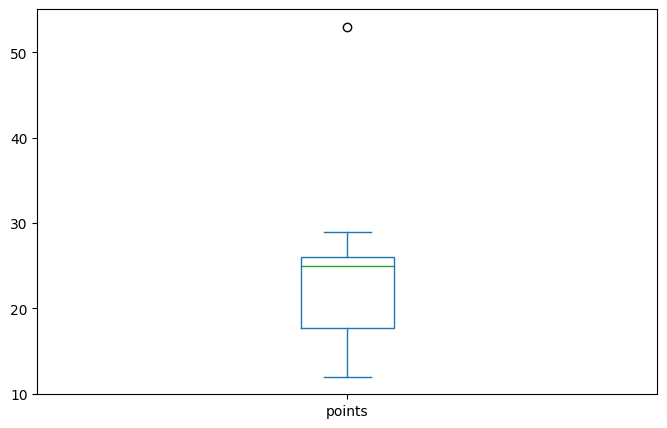

In [24]:
# Plot a boxplot from the dataframe (df) of team points.
df.plot.box()
# or df.boxplot()


<Axes: title={'center': 'points'}, xlabel='[team]'>

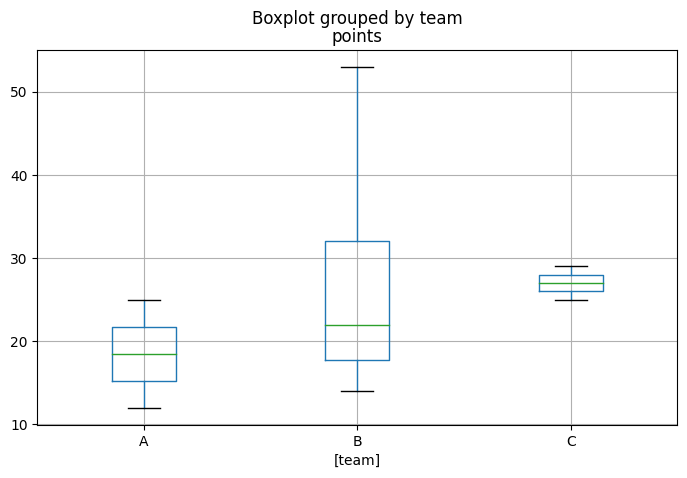

In [25]:
# by = Column in the DataFrame to group by.
df.boxplot(by='team')

### Histogram

<Axes: ylabel='Frequency'>

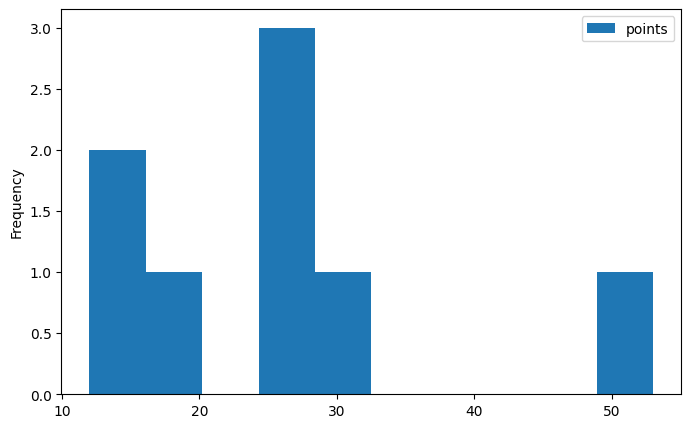

In [26]:
# Default bins = 10
df.plot.hist()

<Axes: title={'center': 'Histogram of Team Points (Bin = 3)'}, ylabel='Frequency'>

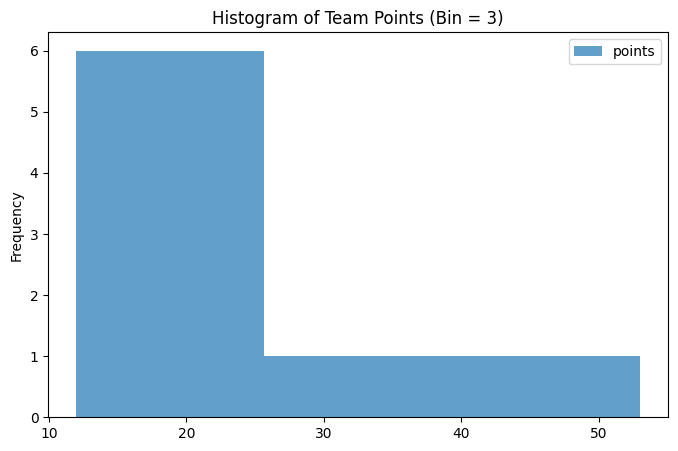

In [27]:
df.plot.hist(bins=3, alpha=0.7, title='Histogram of Team Points (Bin = 3)')

## Visual Analytics : Tips Case Study (Using Pandas and Seaborn)

The Tips dataset is available in the seaborn-data repository belonging to Michael Waskom - the creator of the seaborn python data visualisation package.

According to the <a href='http://vincentarelbundock.github.io/Rdatasets/doc/reshape2/tips.html'>tips dataset documentation</a>, the Tips dataset is a data frame with 244 rows and 7 variables which represents some tipping data where one waiter recorded information about each tip he received over a period of a few months working in one restaurant. In all the waiter recorded 244 tips. The data was reported in a collection of case studies for business statistics (Bryant & Smith 1995). The waiter collected several variables: The tip in dollars, the bill in dollars, the sex of the bill payer, whether there were smokers in the party, the day of the week, the time of day and the size of the party.

In [29]:
import seaborn as sns
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [30]:
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts
# Not many 1- and 6-person parties

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [31]:
#.loc[] is primarily label based, in this case 1-2-3-4-5-6 is a lebel not an index, so endpoint is included
party_counts = party_counts.loc[:,2:5]
party_counts

size,2,3,4,5
day,,,,
Thur,48,4,5,1
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3


size         2         3         4         5
day                                         
Thur  0.827586  0.068966  0.086207  0.017241
Fri   0.888889  0.055556  0.055556  0.000000
Sat   0.623529  0.211765  0.152941  0.011765
Sun   0.520000  0.200000  0.240000  0.040000


<Axes: xlabel='day'>

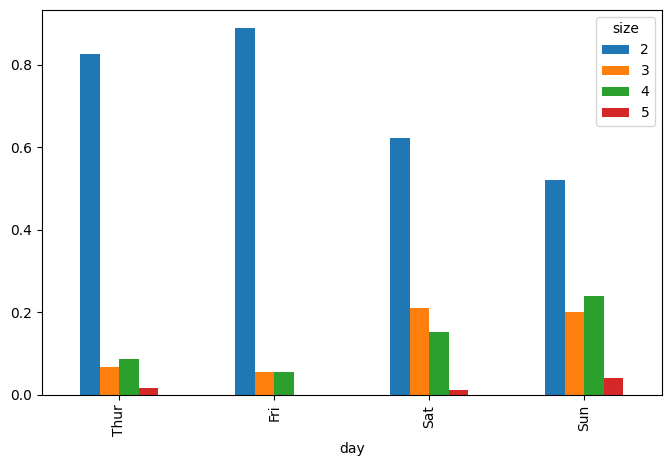

In [32]:
#### Normalize so that each row sum to 1
party_pcts = pd.crosstab(tips['day'], tips[(tips['size'] > 1) & (tips['size'] < 6)]['size'], normalize='index')
print(party_pcts)
party_pcts.plot.bar()

So you can see that party sizes appear to increase on the weekend in this dataset.

Now, calculate tips percentage per bill

In [33]:
# Calculate tip percentage
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069


In [34]:
tips.shape

(244, 8)

In [35]:
tips.describe()

,total_bill,tip,size,tip_pct
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,0.202123
std,8.902412,1.383638,0.951100,0.163385
min,3.070000,1.000000,1.000000,0.036955
25%,13.347500,2.000000,2.000000,0.148274
50%,17.795000,2.900000,2.000000,0.183110
75%,24.127500,3.562500,3.000000,0.236821
max,50.810000,10.000000,6.000000,2.452381


<Axes: ylabel='Frequency'>

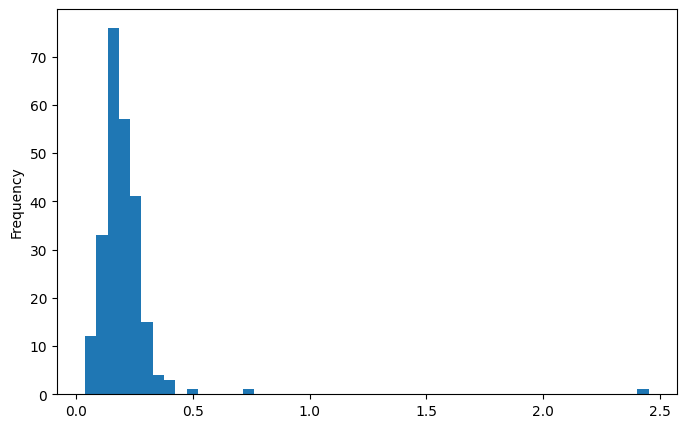

In [36]:
tips['tip_pct'].plot.hist(bins=50)

Did you spot an outlier?

There is one data point where tip percentage is way more than 100%

/var/folders/p4/tbffr9s55dj1cl9_z190r81m0000gn/T/ipykernel_41044/3053299743.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['tip_pct'], bins=50)


<Axes: xlabel='tip_pct', ylabel='Density'>

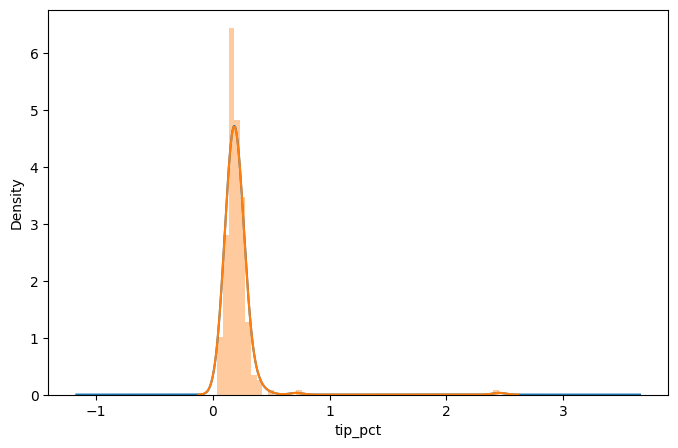

In [41]:
#kernel density estimate (KDE) plots
tips['tip_pct'].plot.density()
sns.distplot(tips['tip_pct'], bins=50)


Now, we will use Seaborn.

#### Countplot

Show the counts of observations in each categorical bin using bars

<Axes: xlabel='day', ylabel='count'>

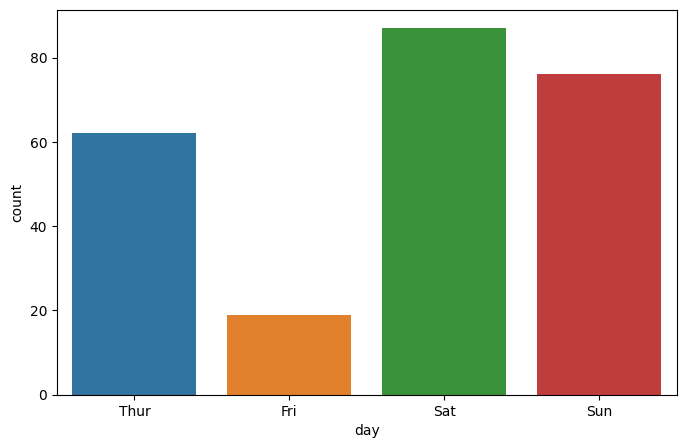

In [42]:
sns.countplot(data=tips, x='day')

Seaborn infers bar order from the data but you can also customize this order.

<Axes: xlabel='day', ylabel='count'>

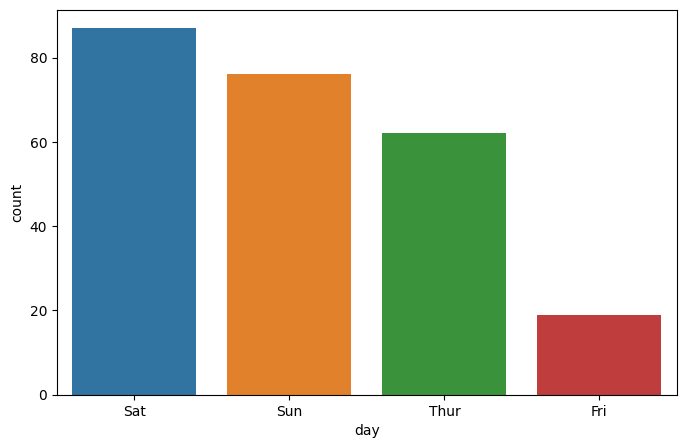

In [43]:
sns.countplot(data=tips, x='day',  order=['Sat','Sun','Thur','Fri',])

<Axes: xlabel='smoker', ylabel='count'>

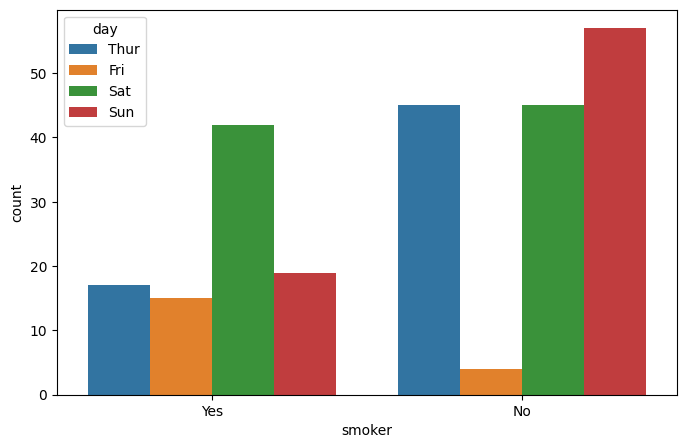

In [44]:
sns.countplot(data=tips, x='smoker', hue='day')

#### Barplot

In seaborn, the barplot() function operates on a full dataset and applies a function to obtain the estimate (taking the mean by default). When there are multiple observations in each category, it also uses bootstrapping to compute a confidence interval around the estimate, which is plotted using error bars

<Axes: xlabel='tip_pct', ylabel='day'>

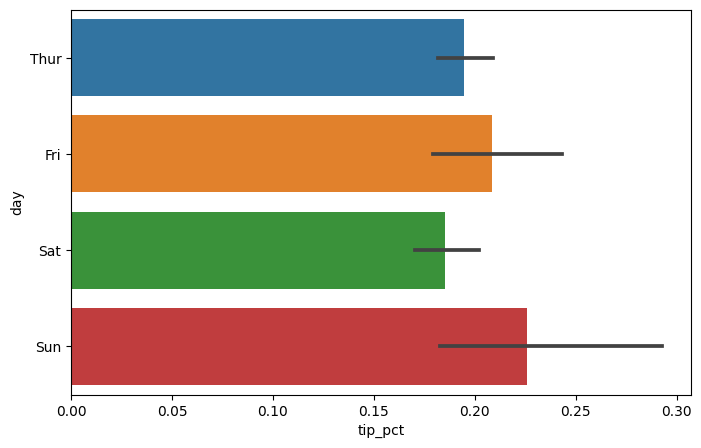

In [45]:
#Because there are multiple observations for each value in the day, the bars are the average value of tip_pct.
#The black lines drawn on the bars represent the 95% confidence interval
sns.barplot(data=tips, x='tip_pct', y='day', orient='h')

<Axes: xlabel='tip_pct', ylabel='day'>

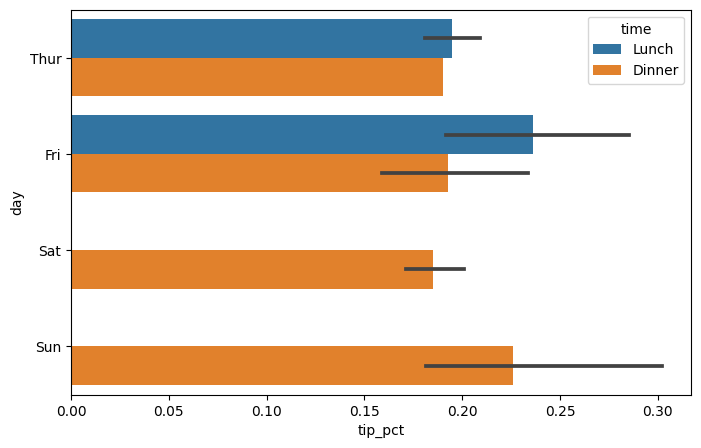

In [46]:
#Hue option enables us to split by an additional categorical value
sns.barplot(data=tips, x='tip_pct', y='day', hue='time')

<Axes: xlabel='tip_pct', ylabel='day'>

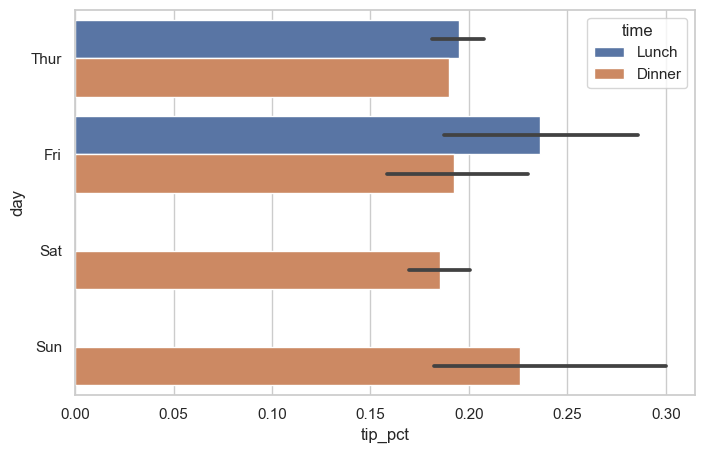

In [47]:
sns.set(style="whitegrid")
sns.barplot(data=tips, x='tip_pct', y='day', hue='time', orient='h')
# barplot has no row and col parameter

#### Catplot

Sometimes you might want to make countplot or barplots in Python, but the data may not in the right format. For example, you might want to make countplot/barplot of the number of things corresponding to multiple categorical variables. However, the data may in the form such that you have compute the counts per category. Seaborn’s Catplot can make that computation under the hood and make the countplot/barplot for you.

The default type is scatter plot. You can change 'kind' to bar, swarm, box, violin, etc.

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


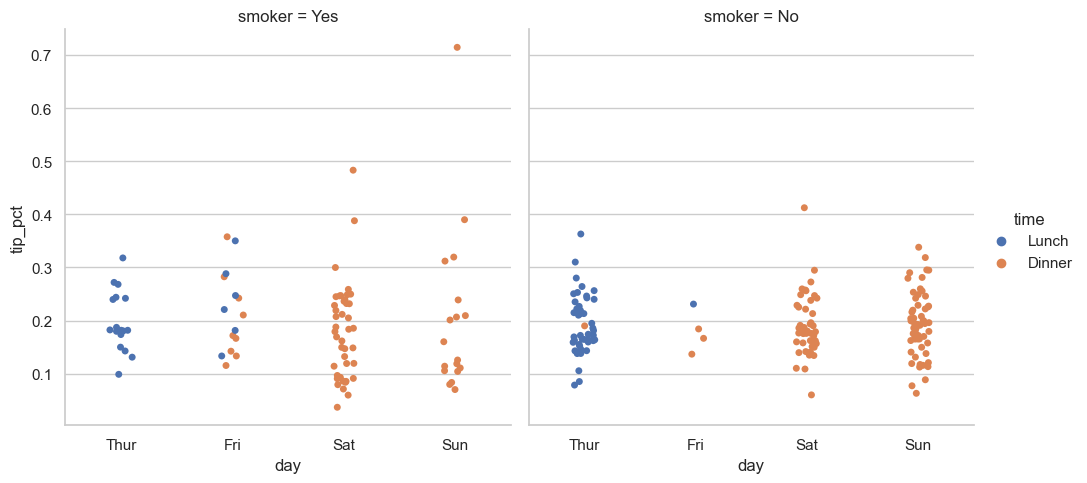

In [48]:
sns.catplot(data=tips[tips.tip_pct < 1], x='day', y='tip_pct', hue='time', col='smoker',
               )

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


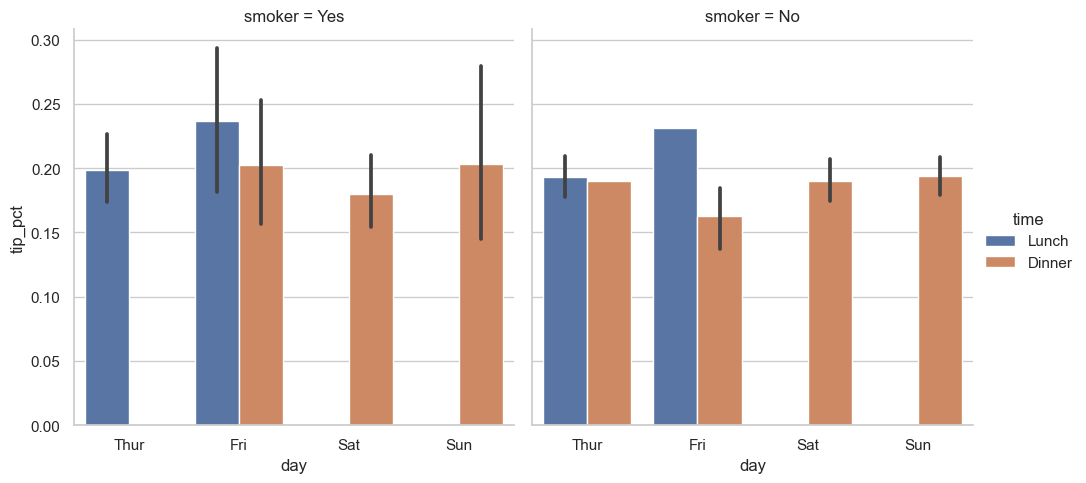

In [49]:
sns.catplot(data=tips[tips.tip_pct < 1], x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar')

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


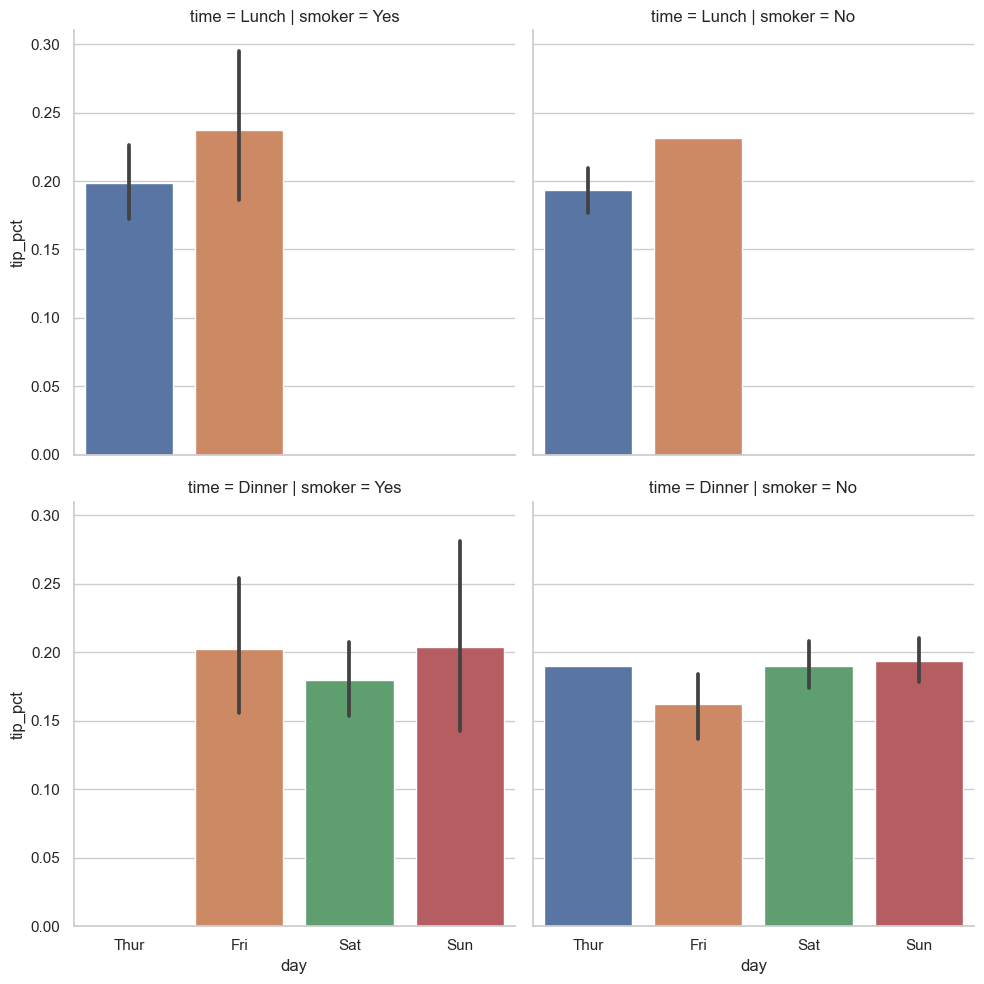

In [50]:
sns.catplot(data= tips[tips.tip_pct < 1], x='day', y='tip_pct', row='time',
               col='smoker', kind='bar')

#### Box and violin plot

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


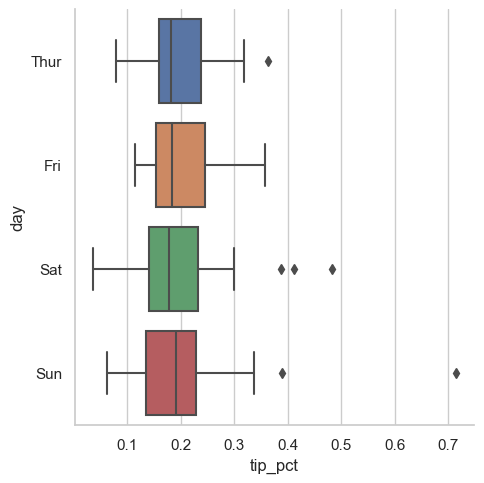

In [51]:
#Box plot with catplot
sns.catplot(data=tips[tips.tip_pct < 1], x='tip_pct', y='day', kind='box')

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


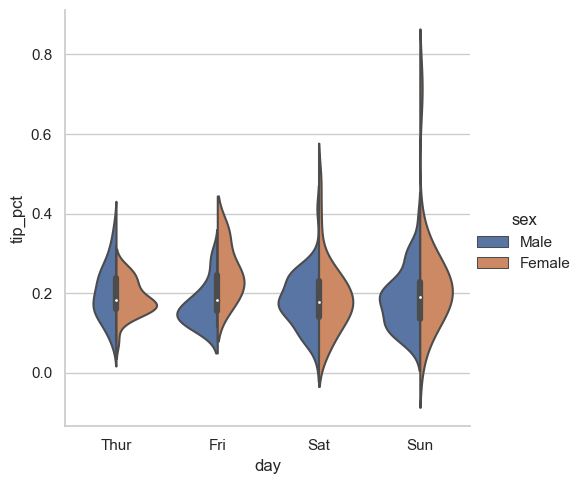

In [52]:
# Violin plot
sns.catplot(data=tips[tips.tip_pct < 1], kind='violin', x='day', y='tip_pct', hue='sex', split=True)

or use seaborn.boxplot()

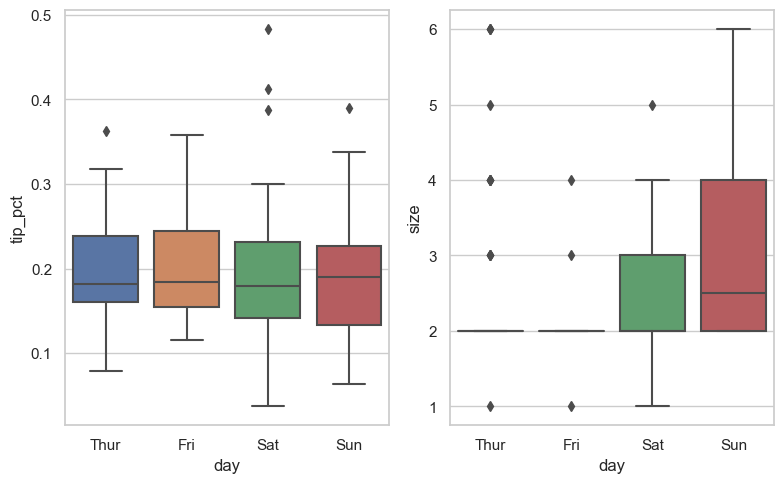

In [53]:
fig, ax = plt.subplots(1,2)
sns.boxplot(data=tips[tips.tip_pct < 0.5], x='day', y='tip_pct',ax=ax[0])
sns.boxplot(data=tips[tips.tip_pct < 0.5], x='day', y='size',ax=ax[1])
fig.tight_layout() # improve subplots spacing

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


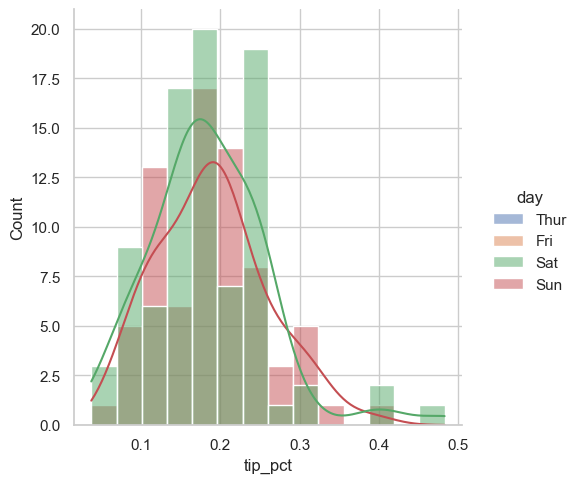

In [54]:
# Distribution plots onto a FacetGrid
weekend_tips = tips[((tips['day'] == 'Sat') | (tips['day'] == 'Sun')) & (tips['tip_pct'] < 0.5)]
sns.displot(data=weekend_tips, x='tip_pct', hue='day', kde=True)

### Regression Plot

**Regplot**

Plot data and a linear regression model fit.

Text(0.5, 1.0, 'Relationship between tip versus  total_bill')

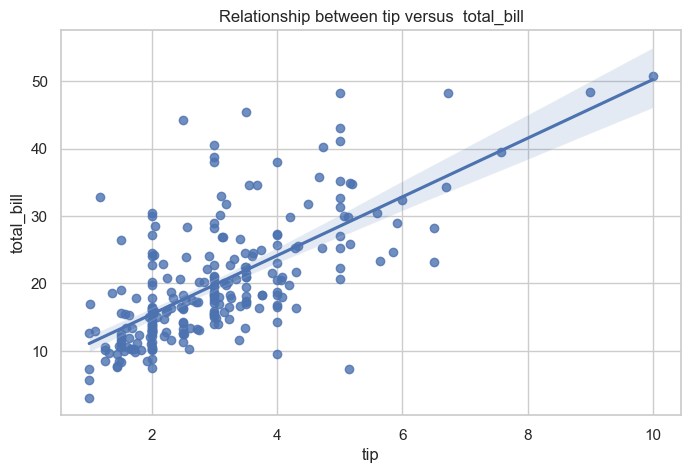

In [55]:
sns.regplot(data=tips, x='tip', y='total_bill')
plt.title('Relationship between %s versus  %s' % ('tip', 'total_bill'))

**Lmplot**

Plot data and regression model fits across a FacetGrid.

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


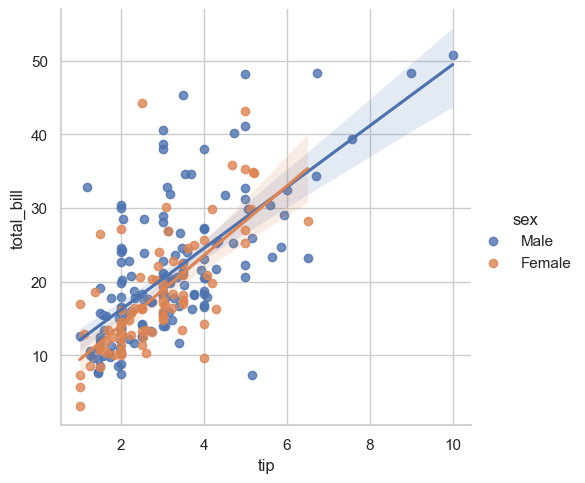

In [56]:
sns.lmplot(data=tips, x='tip', y='total_bill', hue='sex')

### Pair plot

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


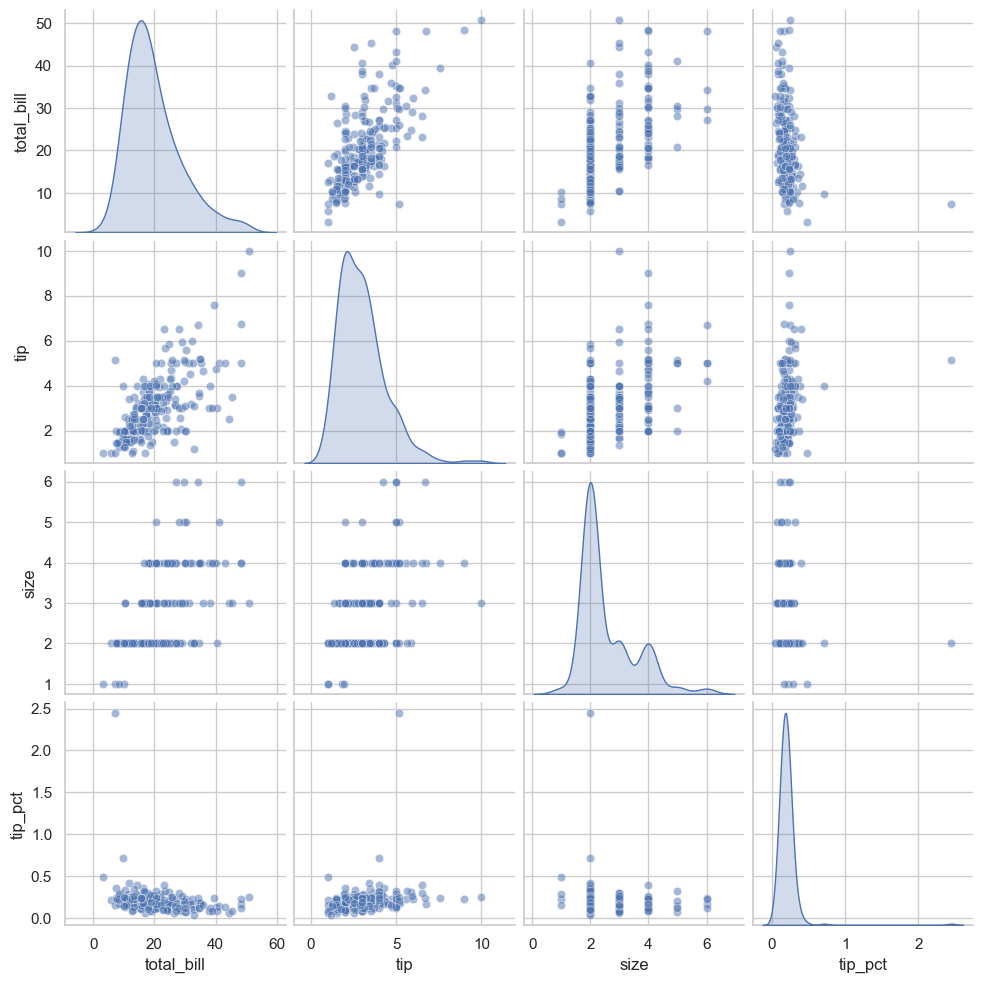

In [57]:
#plot_kws argument enables us to pass down configuration options to the individual plotting calls on the off-diagonal elements.
sns.pairplot(data=tips, diag_kind='kde', plot_kws={'alpha': 0.5})

### Heatmap

Plot rectangular data as a color-encoded matrix.

<Axes: xlabel='size', ylabel='day'>

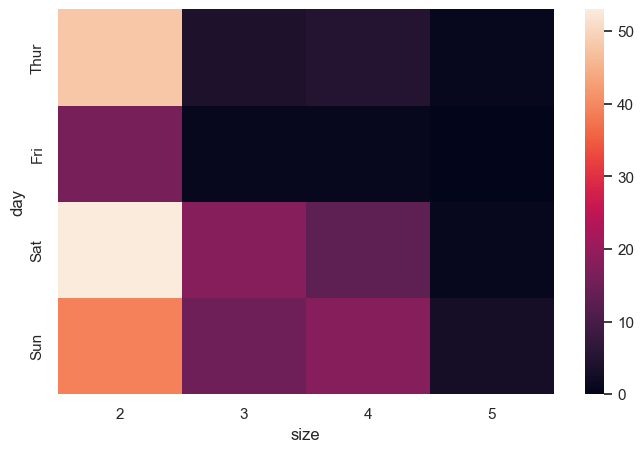

In [58]:
sns.heatmap(data=party_counts)

Text(0.5, 1.0, 'No. of parties by day vs. size')

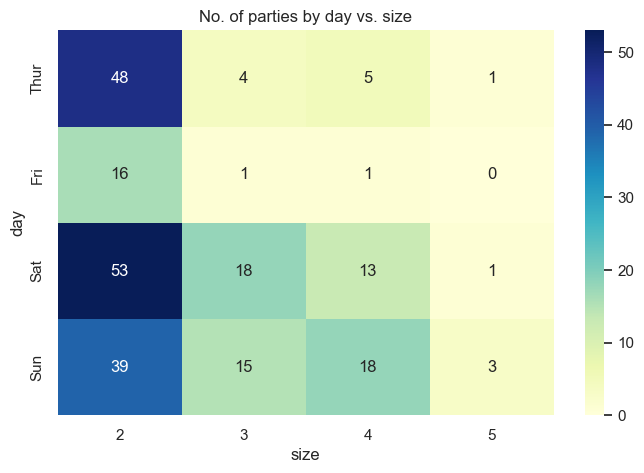

In [59]:
sns.heatmap(data=party_counts, cmap="YlGnBu", annot=True)
plt.title('No. of parties by day vs. size')

To do it with pure Matplotlib https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html#sphx-glr-gallery-images-contours-and-fields-image-annotated-heatmap-py

## More examples

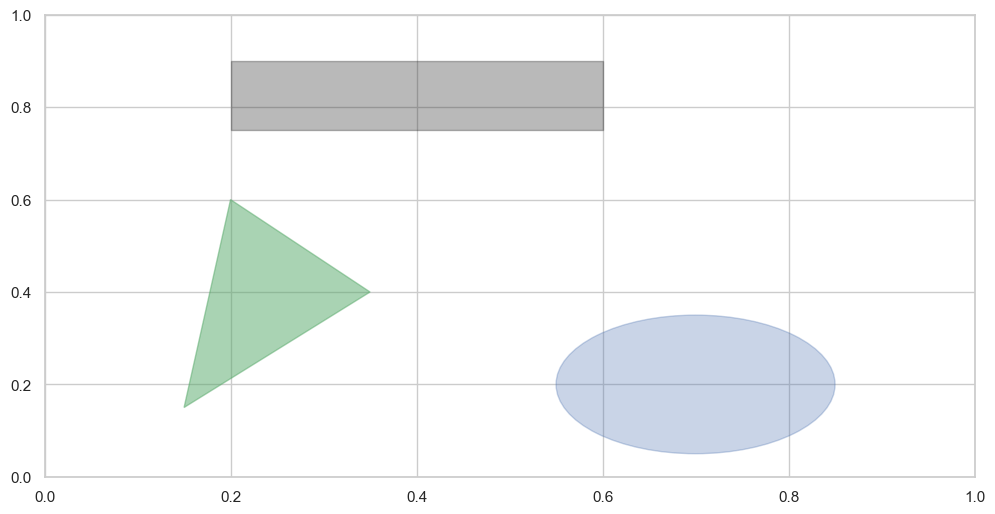

In [60]:
fig = plt.figure(figsize=(12, 6)); ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

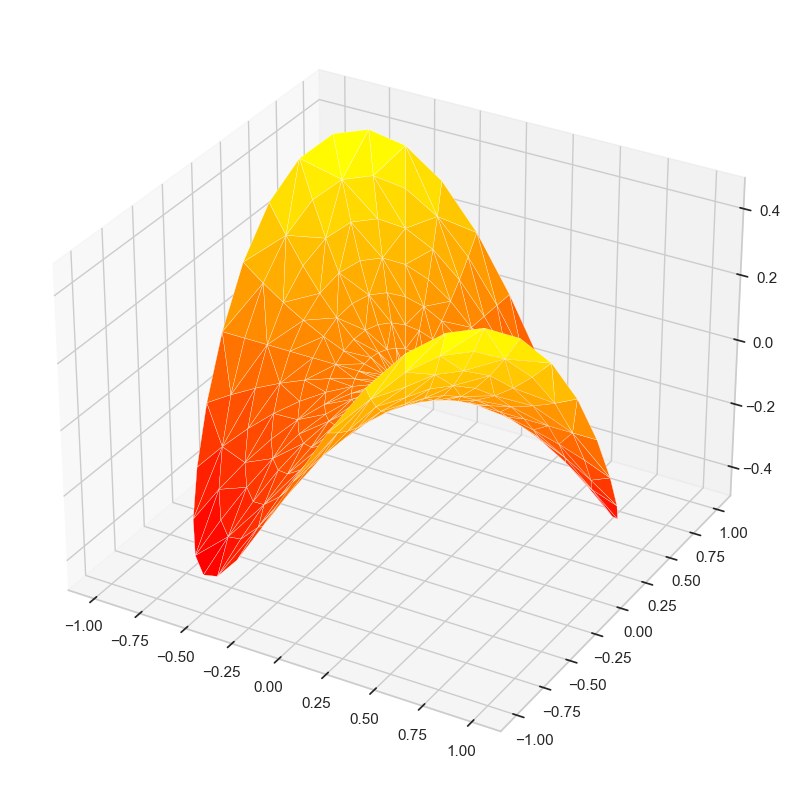

In [61]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

countof_angles = 36
countof_radii  = 8

# array - radii
array_rad = np.linspace(0.125, 1.0, countof_radii)

# array - angles
array_ang = np.linspace(0, 2*np.pi, countof_angles, endpoint=False)

# repeat all angles per radius
array_ang = np.repeat(array_ang[...,np.newaxis], countof_radii, axis=1)

# from polar (radii, angles) coords to cartesian (x, y) coords
x = np.append(0, (array_rad*np.cos(array_ang)).flatten())
y = np.append(0, (array_rad*np.sin(array_ang)).flatten())

# saddle shaped surface
z = np.sin(-x*y)

fig = plt.figure(figsize=(20,10))
ax  = fig.add_subplot(projection='3d')

ax.plot_trisurf(x, y, z, cmap=cm.autumn, linewidth=0.2)

plt.show()
#fig.savefig("vis_3d.png")

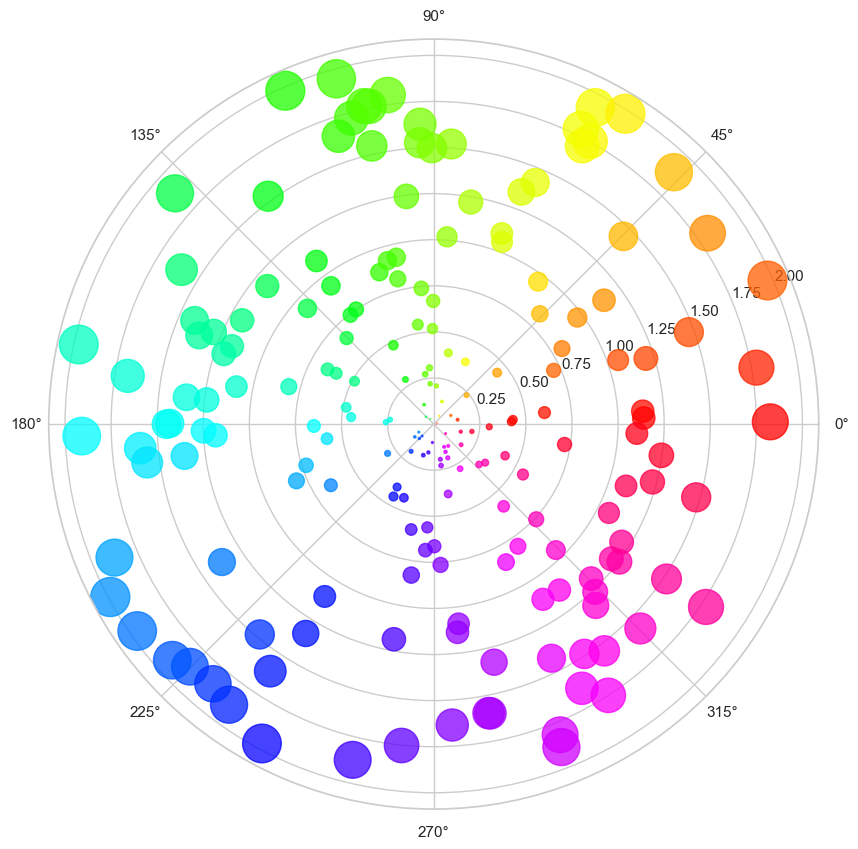

In [62]:
# Compute areas and colors
N = 200
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
area = 200 * r**2
colors = theta

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.75)

plt.show()
#fig.savefig("vis_bubbleplot.png")